# Filling Time Series package: An example

## Developed by: Rolando Duarte and  Erick Rivera 
### Information about it:
<li>
<ul><a href="https://pypi.org/project/FillingTimeSeries/"> PyPI</a> - "pip install FillingTimeSeries"</ul>
<ul><a href="https://github.com/rolandojduartem/FillingTimeSeries"> Github</a></ul>
</li>

### Importing packages


In [1]:
import pandas as pd #Checking datasedt
from FillingTimeSeries.FillingMethods import PrincipalComponentAnalysis, Autoregression, ComponentsAutoregression #Importing methods
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import FillingTimeSeries.FillingMethods as fts
print(help(fts))

Help on module FillingTimeSeries.FillingMethods in FillingTimeSeries:

NAME
    FillingTimeSeries.FillingMethods

DESCRIPTION
    Note: V 0.9.1 Originally, filling data methods was developed by Eric Alfaro and Javier Soley in SCILAB
          Python version was developed by Rolando Duarte and Erick Rivera
          Centro de Investigaciones Geofísicas (CIGEFI)
          Universidad de Costa Rica (UCR)

CLASSES
    builtins.object
        Autoregression
        ComponentsAutoregression
        PrincipalComponentAnalysis
    
    class Autoregression(builtins.object)
     |  Autoregression(df)
     |  
     |  Applies Ulrich & Clayton autoregression method
     |  
     |  Parameters
     |  ----------
     |  df: pandas dataframe
     |      Dataframe
     |  
     |  Methods defined here:
     |  
     |  ULCLMethod(self, lags=1, tol=0.1, itermax=10, valueMin=0.0)
     |      Ulrich & Clayton autoregression method and graphs with original and filled values
     |      
     |      Para

#### Function to plot dataset

In [3]:
def plotColumns(dfOriginal = None, dfFilled = None, rows = 1, columns = 1):
    fig, axArray = plt.subplots(rows, columns, squeeze=False, sharex = True, figsize = (25, 10))
    plt.title("Some filled columns", size = "xx-large")
    index = 0
    for i,ax_row in enumerate(axArray):
        for j,axes in enumerate(ax_row):
            if type(dfFilled) == type(dfOriginal):
                axes.plot(dfFilled.index, dfFilled[dfFilled.columns[index]], color = "red")
            axes.plot(dfOriginal.index, dfOriginal[dfOriginal.columns[index]], color = "blue")
            axes.set_title("Column "+ str(dfOriginal.columns[index]) + ": original and filled values", size = "x-large")
            axes.set_xlabel("Index", size = "x-large")
            axes.set_ylabel("Column " + str(dfOriginal.columns[index]) + " magnitude", size = "x-large")
            index = index + 1
    plt.legend(["Predicted values", "Real values"])
    plt.show()

## Principal-components-based Method
### Checking original time serie
#### Importing dataset

In [4]:
dfOriginal = pd.read_csv("estacionesch_nuevas.txt", delimiter = "\s+", header = 0)
dfOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       400 non-null    float64
 1   b       404 non-null    float64
 2   c       394 non-null    float64
 3   d       403 non-null    float64
 4   e       137 non-null    float64
 5   f       335 non-null    float64
dtypes: float64(6)
memory usage: 19.2 KB


In [5]:
dfOriginal.corr()

,a,b,c,d,e,f
a,1.000000,0.887691,0.885190,0.935759,0.919998,0.907504
b,0.887691,1.000000,0.890720,0.882659,0.892650,0.860643
c,0.885190,0.890720,1.000000,0.919959,0.912407,0.903348
d,0.935759,0.882659,0.919959,1.000000,0.892534,0.915206
e,0.919998,0.892650,0.912407,0.892534,1.000000,0.866316
f,0.907504,0.860643,0.903348,0.915206,0.866316,1.000000


In [6]:
naPercentages = np.around((dfOriginal.isna().sum() / dfOriginal.shape[0]) * 100, 2)
print(naPercentages)

a     1.96
b     0.98
c     3.43
d     1.23
e    66.42
f    17.89
dtype: float64


#### Plotting missing values

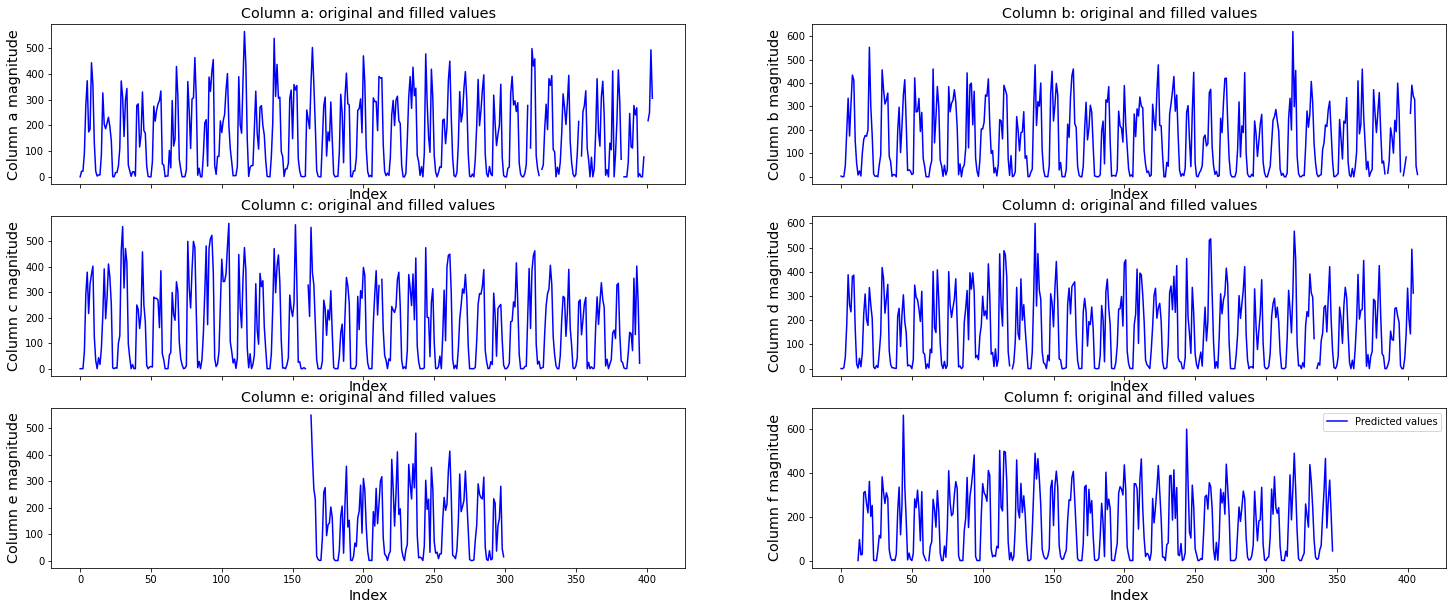

In [7]:
plotColumns(dfOriginal, rows = 3, columns = 2)

### Principal-component-analysis-based method 

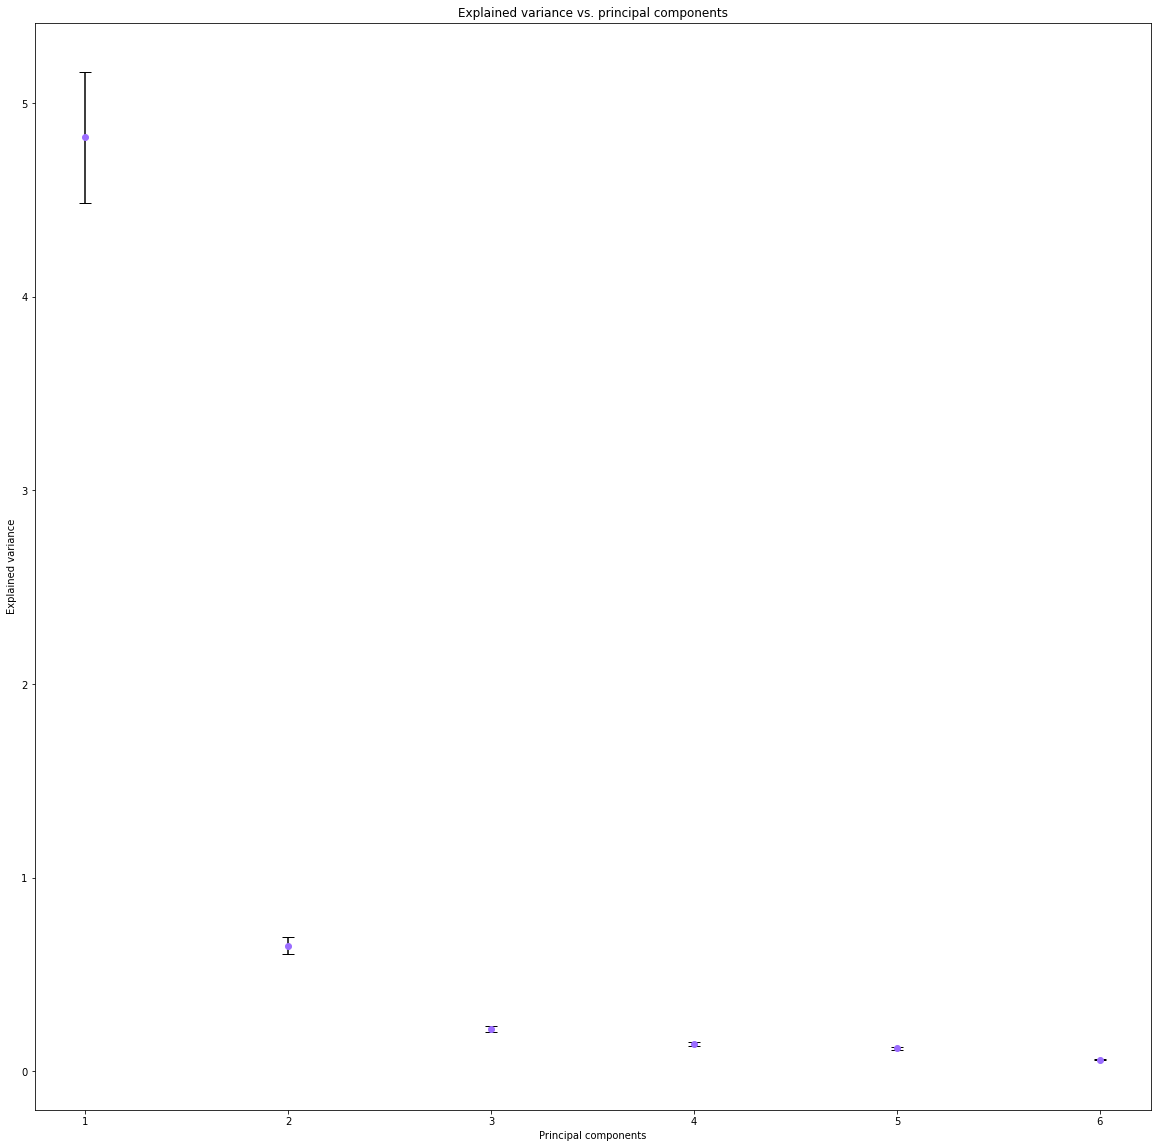

Maximum principal components to use:  5


In [8]:
pca = PrincipalComponentAnalysis(dfOriginal) #Initializing class
upperRange = pca.checkPrincipalComponents() #Maximum principal components you can use
print("Maximum principal components to use: ", upperRange)

In [9]:
dfFilled = pca.PCAMethod(components = 1, tol = 0.001, itermax = 1000, valueMin = 0) #Filling Time Serie (Every argument is necessary)
dfFilled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       408 non-null    float64
 1   b       408 non-null    float64
 2   c       408 non-null    float64
 3   d       408 non-null    float64
 4   e       408 non-null    float64
 5   f       408 non-null    float64
dtypes: float64(6)
memory usage: 19.2 KB


### Plotting datasets

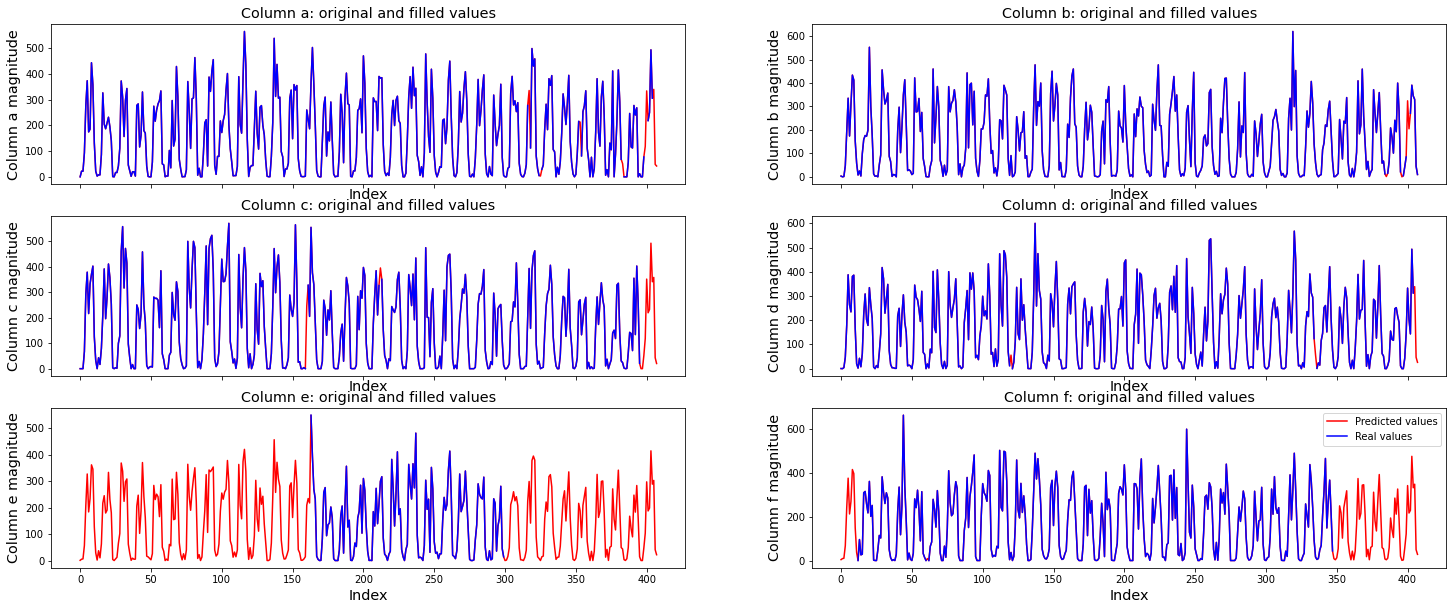

In [10]:
plotColumns(dfOriginal, dfFilled, rows = 3, columns = 2)

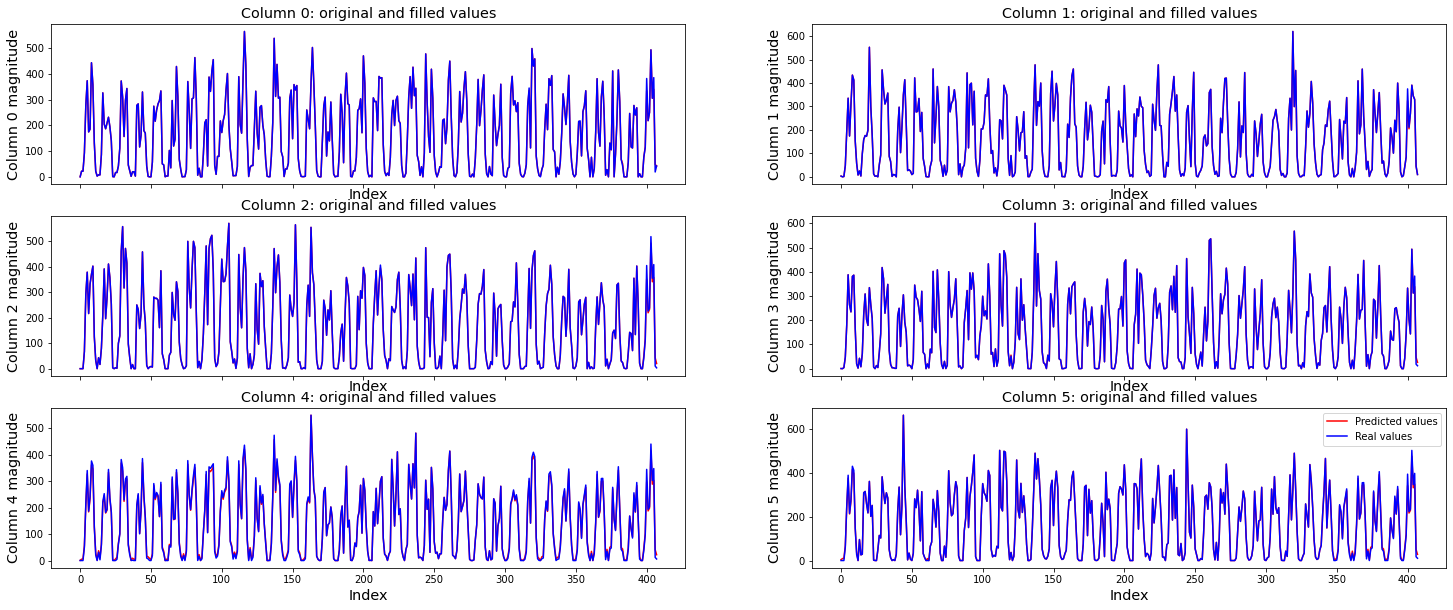

In [11]:
df = pd.read_csv("a.csv", delimiter = ",", header = None)
for column in df.columns:
    df.iloc[:, int(column)][df.iloc[:, int(column)] < 0] = 0
plotColumns(df, dfFilled, rows = 3, columns = 2)

## AutoRegression-based method
### Original dataset
#### Importing dataset

In [12]:
dfOriginal = pd.read_csv("datest.txt", delimiter = "\s+", header = 0, na_values = "Nan")
dfOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       442 non-null    float64
 1   b       463 non-null    float64
dtypes: float64(2)
memory usage: 7.8 KB


In [13]:
naPercentages = np.around((dfOriginal.isna().sum() / dfOriginal.shape[0]) * 100, 2)
print(naPercentages)

a    10.16
b     5.89
dtype: float64


#### Plotting missing values

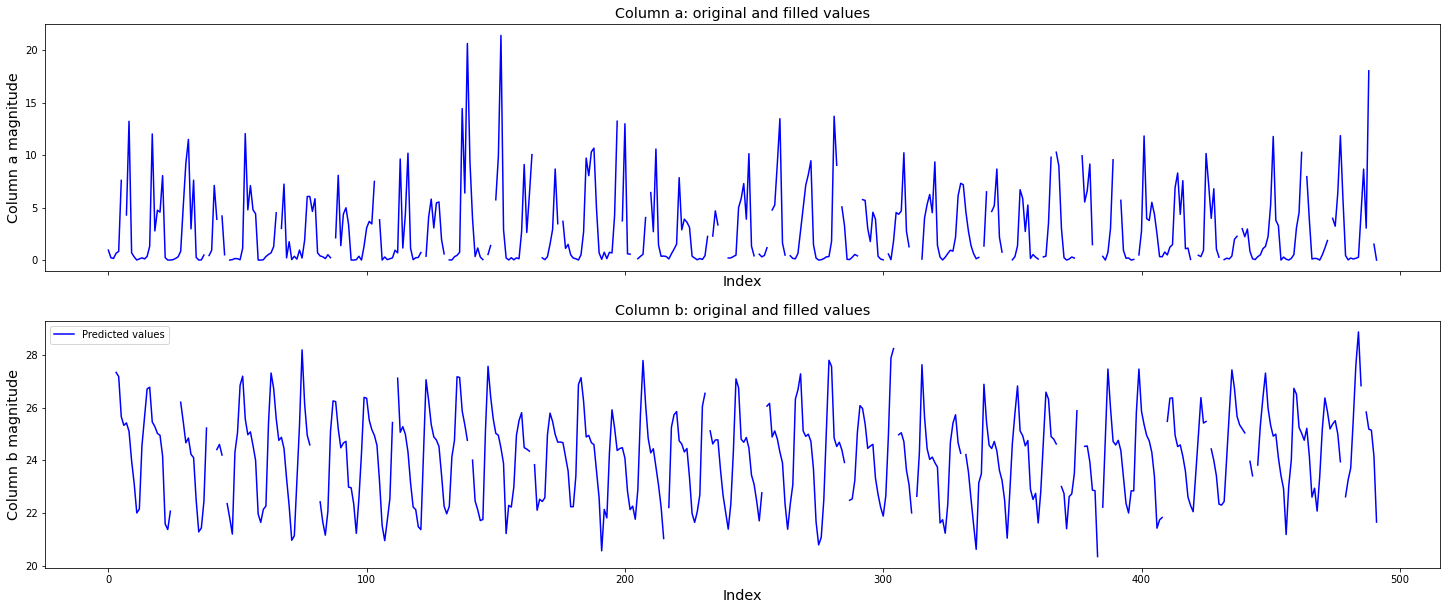

In [14]:
plotColumns(dfOriginal, rows = 2, columns = 1)

#### Autoregression-based method

In [15]:
AR = Autoregression(dfOriginal)
dfFilled = AR.ULCLMethod(lags = 12, tol = 0.001, itermax = 1000, valueMin = 0)# (lags, tolerance, maximum iterations, minimum value)

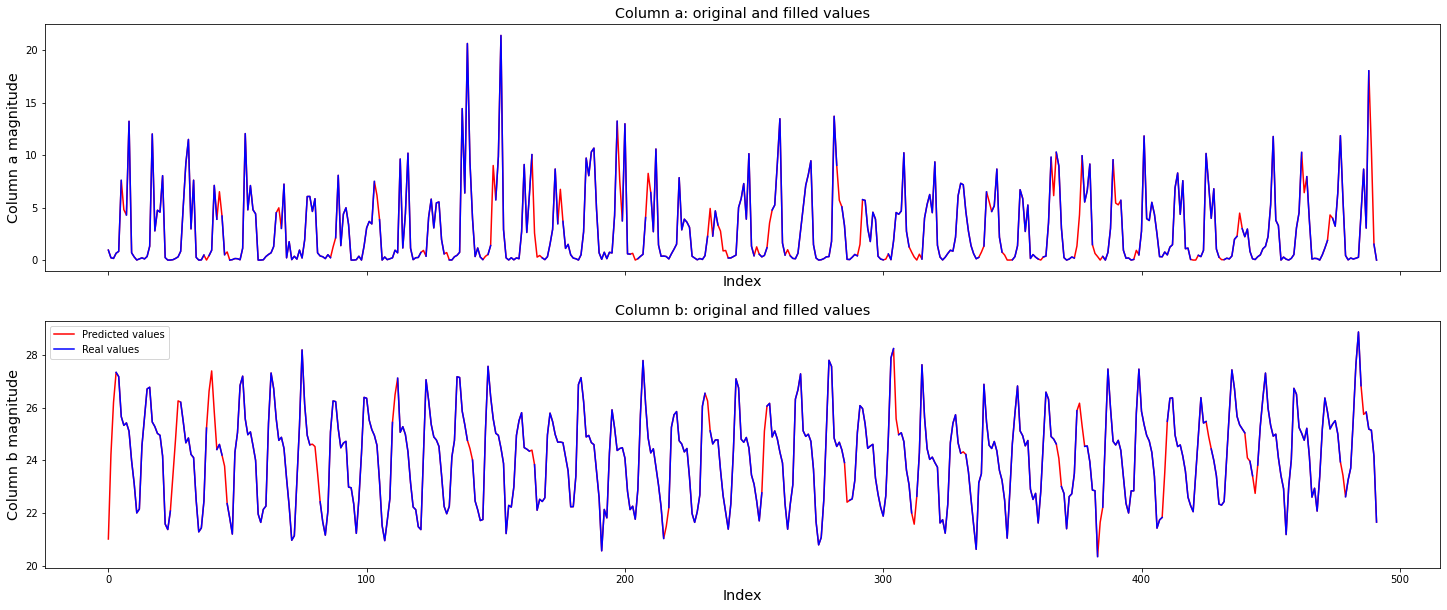

In [16]:
plotColumns(dfOriginal, dfFilled, rows = 2, columns = 1)

In [17]:
print(dfOriginal.columns)
print(dfFilled.columns)

Index(['a', 'b'], dtype='object')
Index(['a', 'b'], dtype='object')


## Full Method
### Checking original time serie
#### Importing dataset

In [18]:
dfOriginal = pd.read_csv("estacionesch_nuevas.txt", delimiter = "\s+", header = 0)
dfOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       400 non-null    float64
 1   b       404 non-null    float64
 2   c       394 non-null    float64
 3   d       403 non-null    float64
 4   e       137 non-null    float64
 5   f       335 non-null    float64
dtypes: float64(6)
memory usage: 19.2 KB


#### Plotting missing values

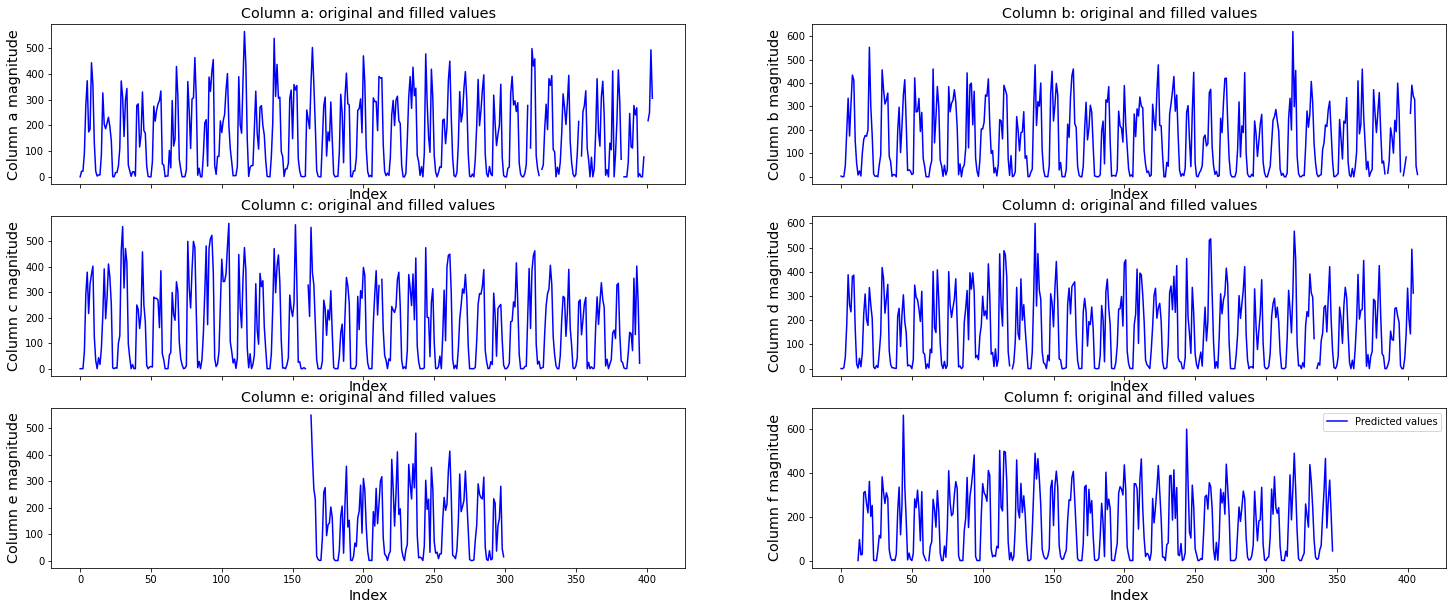

In [19]:
plotColumns(dfOriginal, rows = 3, columns = 2)

### Full method application

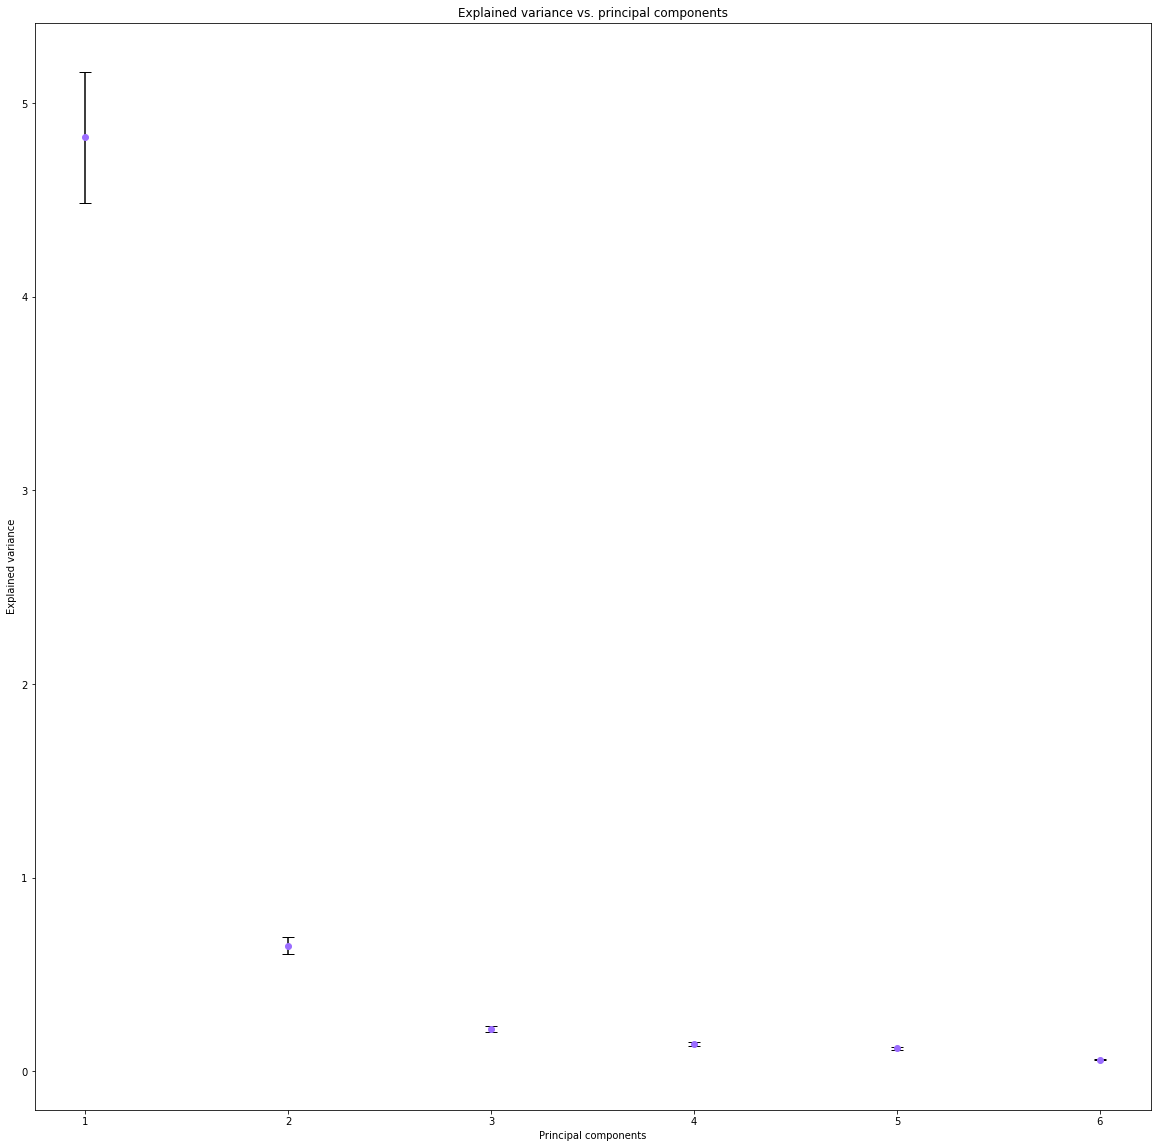

Maximum principal components to use:  5


In [20]:
full = ComponentsAutoregression(dfOriginal) #Initializing class
upperRange = full.checkPrincipalComponents() #Maximum principal components you can use
print("Maximum principal components to use: ", upperRange)

In [21]:
dfFilled = full.FullMethod(lags = 12, components = 1, tol = 0.001, itermax = 1000, valueMin = 0)

### Plotting datasets

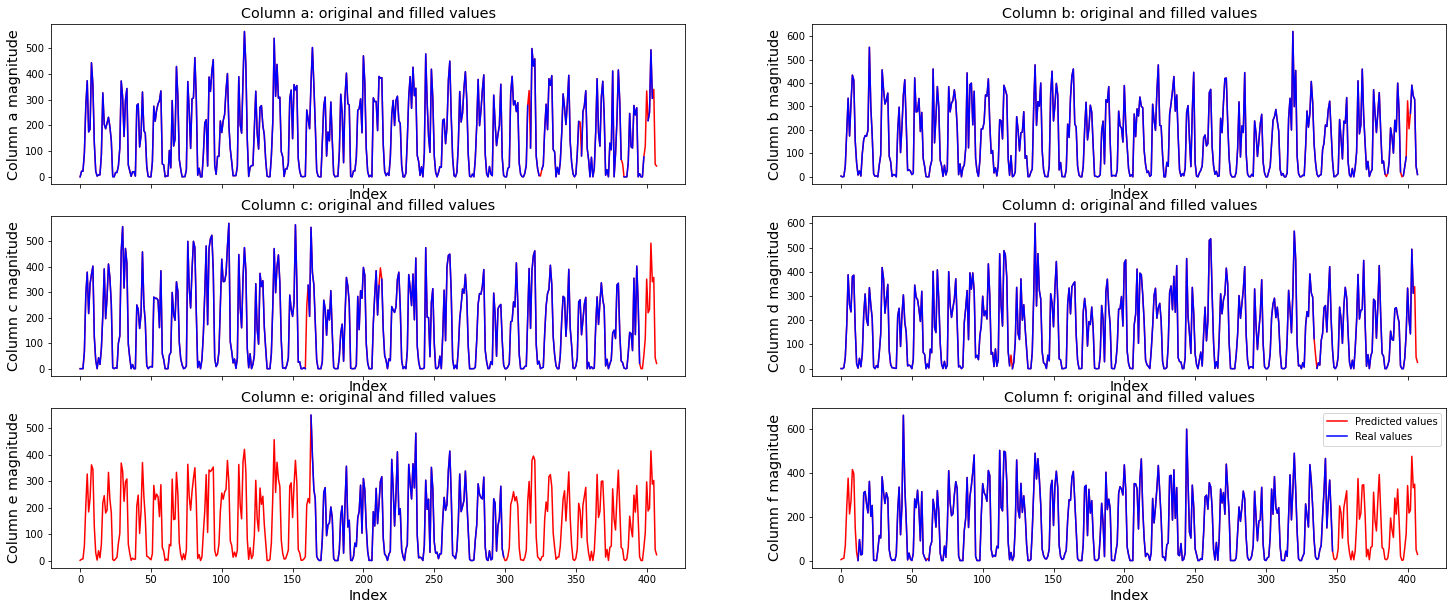

In [22]:
plotColumns(dfOriginal, dfFilled, rows = 3, columns = 2)